# Week 3 Theoretical Exercises
<font color="red">It is very imporant that you <b>try</b> to solve every exercise. It is not important that you answer correctly. Spend no more than 5-10 min on each exercise. If you do not solve the exercise, focus on understanding the question, and try to figure out what it is you do not understand.<br/><br/> 

The TA's will be very happy to answer questions during the TA session or on the board. </font>

# 1. In Sample Error
Assume we are given a fixed hypothesis $h \in H$, and we are considering 0-1 loss.
Now we sample a data set $X = {(x_1,y_1),\dots,(x_n,y_n)}$ where each sample is sampled independently at random.

Show that the expected value (over the data set) of $E_{in}(h) = \frac{1}{n} \sum_{i=1}^n 1_{h(x_i)\neq y_1}$ (number of mispredictions/number of points) is equal to $E_{out}(h)$. 


# 2. Exercise 1.11 in the Book (page 25) 

# 3. Exercise 1.12 in the Book (page 26) 


# 4. Coding Categorical Features
You are solving a problem with machine learning and have decided to use linear regression. 
One of the data features is categorical and has four unordered values: Apple, Banana, Grape, Mango. 
How could you use that feature in a linear regression model (or logistic regression for that matter)?

# 5. Spam Filters
You are given the task to design a spam filter using **logistic regression**.

The input data consists of a list of (email, spam/not spam label), and each email is represented by a variable length text string. 
Can you train a spam filter using this data and if so how? What issues do you see and do you have any ideas how they could be adressed?


# 6. Convex Functions 

See https://en.wikipedia.org/wiki/Convex_function for the definitions of convex functions.
There are three ways to prove a functions is convex. Use the easiest one for each task :).

We often think of convex functions as bowl shaped. For instance $x^2$ is a classic convex function.

Which of the following functions are convex on ${\mathbb R}$? 

-   $f(x) = 2$

-   $f(x) = -\ln (x), x>0$

-   $f(x) = x^3$

-   $f(x) = x^2 + x^4$


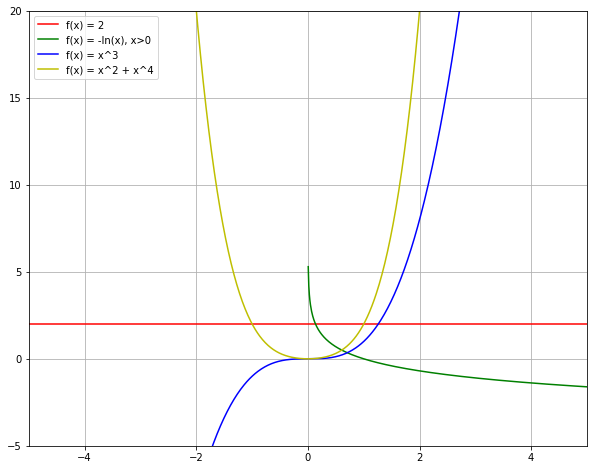

In [27]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Lets plot them
n = 5
x = np.linspace(-n, n, 1000)
xp = x[x>0]
plt.figure(figsize=(10,8))
plt.plot(x, [2 for y in x], 'r-', label='f(x) = 2')
plt.plot(xp, [-np.log(z) for z in xp], 'g-', label='f(x) = -ln(x), x>0')
plt.plot(x, x**3, 'b-', label='f(x) = x^3')
plt.plot(x, x**2 + x**4, 'y-', label='f(x) = x^2 + x^4')
plt.legend()
plt.axis([-n,n,-5,20])
plt.grid(True)

plt.show()


# 7. Error Functions

Assume you work for a security company and have a fingerprint scanner.
False Positives you **really really** do not want, but False Negative is more
of a nuiscance. So you decide on the following error function (as we saw
in the lecture) 

$$\mathrm{e}_s(f(x),h(x)) =
\left\{
  \begin{array}{l l}
    0 & \mathrm{ if  } \quad f(x) = h(x)\\
    1 & \mathrm{ if  } \quad f(x) =1, h(x) = 0\\
    1000 & \mathrm{ if  } \quad f(x) =0, h(x) = 1
  \end{array}
  \right.$$ 
  
  All you know is Logistic Regression (the standard one with
0-1 labels from the Machine Learning class) which you train on the data
given to you and learn the distribution $p(y \mid x)$ (at least
approximately). 

* How can we use our learned hypothesis to try and
minimize the biased cost function $\mathrm{e}_s$ instead of $0/1$ loss
$(e(x,y) = 1_{[x\neq y]})$ where we would return the most likely class?
* Is there a general approach for other methods than logistic regression as long as we estimate probabilities?








# 8. Maximum Likelihood Linear Regression

The Linear Regression method may also be derived as a maximum likelihood
procedure. In linear regression the function we learn is choosen to
minimize mean squared error, a criterion that we introduced more or less
arbitrarily.

I.e. Given X, y compute
$$
w_{\textrm{opt}} = \textrm{argmin}_w: \sum_{i=1}^n (w^\intercal x_i - y_i)^2
$$
We now revisit Linear Regression from the point of view of maximum
likelihood estimation. 

We consider the target function a conditional distribution $p(y
| x)$ and assume it is defined as
$$
p(y\mid x,w) = w^\intercal x + \varepsilon, 
$$ 
for some unknown $w$, where $\varepsilon$ is a
noise term independent of $x$ that is normally distributed with zero
mean and variance $\sigma^2$ i.e. 
$$
\mathbb{E}[\varepsilon] = 0, \mathbb{E}[\varepsilon^2] =\sigma^2
$$

For the (1D) normal distribution with mean $\mu$ and variance $\sigma^2$
the probability density function is
$$
p(x) = \frac{1}{\sqrt{2\sigma^2\pi}}e^{-(x-\mu)^2/2\sigma^2}
$$

In other words, given $x$, the target function  outputs a value $y$ that is
distributed as a Gaussian (normal distribution) around $w^\intercal
x$. 
We can now write $p(y\mid x,w)$ as
$$
p(y \mid x,w ) = \frac{1}{\sqrt{2\sigma^2\pi}}e^{-(y-w^\intercal x)^2/2\sigma^2}
$$
for some unknown $w$ that we wish to learn. 
*We have plotted a data set from such a function in the next cell below (after the out of sample question).*

We want to make an algorithm that computes the maximum likelihood
parameters $w_\textrm{ml}$ of our model. We are given a data set $D
= \{(x_i, y_i) \mid i = 1, \dots, n\}$ and for a fixed $w$ we let $P(D
\mid w) = \prod_{i=1}^n p(y_i \mid x_i ,w)$ be the likelihood of the
data given $w$. Your job is to derive an algorithm for computing the
maximum likelihood parameters, namely
$w_\mathrm{ml} = \operatorname*{arg\,max}_w
P(D \mid w)$.

Hint: Minimize the negative log likelihood of the data instead and note
that we end up with a formula for computing $w$ that should look
familiar.

This also entails that least squares is also a cross entropy.
See, https://stats.stackexchange.com/questions/288451/why-is-mean-squared-error-the-cross-entropy-between-the-empirical-distribution-a
## Out of sample error 
Given that the target function is actually the noisy linear model above, $p(y\mid x,w) = w^\intercal x + \varepsilon$ 

What is the best *out of sample error* possible using the least squares error function, $e(x,y) = (x-y)^2$?

Hint: What is the optimal classifier? What is the out of sample error of
that one?

In [24]:
# Lets plot some noisy data. It is easy....
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

sigma = np.pi
n = 30
data = np.c_[np.ones(n), np.linspace(-10, 10, n)]
w = [np.e, np.pi]
target = data @ w + sigma * np.random.randn(n)
plt.plot(data[:,1], target, 'bx', label='Linear target function with noise')
plt.legend()
plt.show()

# 9. Show that the cost function for Logistic Regression is convex (Hard Exercise)
### Try at least the first part

In class we derived that for Logistic Regression the Negative Log Likelihood (NLL)
that we needed to find the minizing parameters for is defined as 
$$
NLL(w) = - \sum_{i=1}^n y_i \lg (\sigma (w^\intercal x)) + (1-y_i) \lg (1 -\sigma (w^\intercal x))
$$
We need to prove that NLL(w) is a convex function (data X, y fixed as usual).
A sum of convex functions is convex so we can ignore the sum and focus on just one element.
i.e. we need to show that
$$
f(w) = - y_i \lg (\sigma (w^\intercal x)) - (1-y_i) \lg (1 -\sigma (w^\intercal x))
$$
is a convex function.

In the following we let $p=\sigma(w^\intercal x)$ so ease up the writing

We will do this in simple steps. First let us assume that x and w are 1D vectors i.e. numbers.
To prove that $f$ is convex we can prove that $f''(w) >= 0$ for all $w$.
* Step 1. Prove that $f'(w) = - y \cdot x(1-\sigma(w x)) + (1-y) \cdot x \cdot \sigma(w x) = - x(y - \sigma(w x))$ # check signs
* Step 2. Prove that $f''(w) =  x \cdot x  (\sigma(w x) \cdot (1 - \sigma (w x)) $
* Step 3. Argue that $f''(w) >= 0$ for all w

As for Linear Regression we can compute the gradient in a forward and a backwards pass completely automated. See below.

To generalize this to d-dimensional $w$ and $x$ the same steps apply except now we have to do vector derivatives. Oh Oh.
We will do it in python below as we did for Linear Regression. 

* Step 1. Show that the Jacobian of f is  $(y - \sigma(w^\intercal x)) x^\intercal$, note that the gradient is the tranpose of that

The Hessian matrix can be considered related to the Jacobian matrix by $H(f(x)) = J(\nabla f(x))^\intercal$.
I.e. it is the Jacobian of the Gradient, or the Jacobian of the transposed Jacobian if you will.
So define the Gradient as $g(w) = x^\intercal (y-\sigma(w^\intercal x)$ and compute derivatives of w again to get the jacobian. Note that the gradient is a function from $\mathbb{R}^d \rightarrow \mathbb{R}^d $ so the jacobian of that is a $d \times d$ matrix.

* Step 2. Show that the Hessian of is $p (1-p) x x^\intercal$ (note that this is an outer product)

* Step 3. Show that $x x^\intercal $ is a Positive Semidefinite Matrix, i.e. $v^\intercal x x^\intercal v >= 0$ for all vectors v, Argue that the Hessian is a PSD.



In [14]:
import numpy as np
# arbitrary data and w
from scipy.special import expit as sigmoid

w = np.array([1, 2,]).reshape(2,1)
x = np.array([1, 2]).reshape(2, 1)
y = np.array([1]).reshape(1,1)
# forward pass
print('Lets compute the NLL nice and slow')
z = w.T @ x
p = sigmoid (z)
l1 = np.log(p)
l2 = np.log(1-p)
f1 = y * l1
f2 = (1-y) * l2
nll = -(f1+f2)

print('NLL of w on data x,y: ', nll)
print('Let us Rule the Chain backwards again until we find w - somewhat tricy')
dnll_f1 = -1
dnll_f2 = -1
df1_l1 = y
df2_l2 = (1-y)
dl1_p = 1/p
dl2_p = -1/(1-p)

print('Here we have two derivatives using p. The almighty CHAIN RULER says ADD THEM UP to get partial derivative of nll after p. ')
print('So please for every time we see p compute partial derivate of nll as a function of p, d_nll/d_p and ADD THEM UP')
dnnl_l1 = dnll_f1 * df1_l1 # chain rule d_nnl/d_l1 = d_nll/d_f1 * d_f1/d_l1
dnnl_l2 = dnll_f2 * df2_l2
dnnl_p = dnnl_l1 * dl1_p + dnnl_l2 * dl2_p
print('Now we have partial derivative of nll as a function of p and we know that d_nll/d_w = d_nll/d_p * d_p/d_w')
dp_z = p*(1-p)
dz_w = x.T
J_nll = dnnl_p * dp_z * dz_w
print('The jacobian shape:', J_nll.shape)
print('The jacobian it self:', J_nll)
print('Reading off what we wrote the Jacobian it is: (-1 *y * 1/p - (1-y) * (-1/(1-p))) * p * (1-p) * x.T which is:\n -x(y - \sigma(w.T @ x))')
print('Since p = sigmoid(w.T x)')
print('Another win for the machine - Now repeat to find the Hessian...')

# 10. Nonlinear Transforms

As seen in class we can transform the data to make nonlinear fits of the input data even when we are still learning linear models.
The simplest is the polynomial transform that was also shown at the lecture.
Assume the input is $n$ data points $x_1,\dots, x_n$of $d$ dimensions.
For the second degree polynomial transform we make this into all polynomials of max total degree at most two.
I.e. if d = 2 and the input point is $p = (p_1, p_2)$ this becomes 

$$
\phi(p) = (1, p_1, p_2, p_1^2, p_2^2, p_1 p_2)
$$

which is 6 dimensional. **Notice that the order is irrelevant**

* Still using input dimension d=2, how many dimensions in the transformed points if we instead use degree 3 polynomial transform? What about a $k$ degree transform?
* For general input dimension $d$ and polynomial transform target dimension $k$ how many features do you get?
* How long will it take to compute the transform?



In [30]:
# in python code
p1 = 2.0
p2 = 3.0
p = np.array([p1, p2])
phi_p = np.array([1.0, p1, p2, p1**2, p2**2, p1*p2 ])
print('p -> phi(p): ', p, ' -> ', phi_p)

# 11 Sneak Peak on PLA and Non-linear Transform
In the coding exercise you will (among other things) have to implement the Perceptron Learning Algorithm with Non-Linear Transforms. It might be useful (and fun) to play with the following <a href="https://cs.au.dk/~alexmath/nonlt.html" target="_blank">visualization</a>. Run the Python code below or open the <a href="https://cs.au.dk/~alexmath/nonlt.html" target="_blank">link</a> in another window, so you can see the visualization while reading the explanation. 

The data was generated uniformly at random inside a square. The green circle is the unkown target function. If examples fall "inside" this target function they are classified as +1 (blue) and if they are outside they are classified as -1 (red). The goal is to approximate the green circle by looking only at the data samples. 

This is impossible if we only use a single line. Therefore we apply a feature tranfsorm to the data. The feature transformed data is visualized to the right. Notice that the target function is also plotted in the feature space. But this time it is a line! By clicking step you can see the PLA continuously update its hypothesis; this is represented as the blue line in the feature space. As a bonus, the corresponding decision boundary is also depicted on the "non-feature transformed" data in the left window. 

Tasks
<ol>
<li>Try to run the PLA with different random weights on different datasets. Figure out what all the buttons do. </li>
<li>Which feature transform do you think is used? Why? (HINT: see page 99 figure 3.5)</li>
<li>Try run the PLA with 10, 50, 100, 1000 points. Do you expect it to generalize differently? </li>
</ol>


In [4]:
from IPython.display import IFrame
IFrame('https://cs.au.dk/~alexmath/nonlt.html', width=900, height=900, border=0)

# 12. Cross Entropy - What is it 
This is not an exercise but some extra material for the interested student. Why is our cost called Cross Entropy.
In sense this is the cost function we always almost use.
Since this is not a course in information theory we will just provide a link and a video for the interested student.

See the Khan academy video https://www.khanacademy.org/computing/computer-science/informationtheory/moderninfotheory/v/information-entropy
for an explanation of entropy.

If you understand that read the following to see if you can understand why it is called Cross Entropy.
https://www.quora.com/Whats-an-intuitive-way-to-think-of-cross-entropy

